In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def true_relation(z):
    A, B, C = 3.7, 0.1, 2.1 # True parabola parameters
    return A*z**2 + B*z + C

In [153]:
def generate_data(samples_num:int=200, eps_dev: float=20):
    x = np.linspace(0.1, 5, samples_num)
    y = true_relation(x)
    y_n = np.abs(y + np.random.normal(scale=eps_dev,size=(samples_num,)))
    return x, y, y_n

In [159]:
def plot_data(x, y_true, y_noise, y_pred=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.plot(x, y_true,'g', label='true data')
    ax.scatter(x, y_noise, s=5, label='true data with noise')
    if y_pred is not None:
        ax.plot(x, y_pred,'r',label='predicted data')
    
    ax.set_ylabel('Land\'s Price')
    ax.set_xlabel('Land\'s side length')
    
    ax.set_xticks(np.linspace(0,5,11))
    #ax.set_xticklabels(np.linspace(0,10,11))
    ax.grid(True)
    
    ax.legend()
    
    ax.set_title('Data (Green line is true data, dots are noisy observations)')
    
    return ax

In [160]:
x, y, y_noise = generate_data()

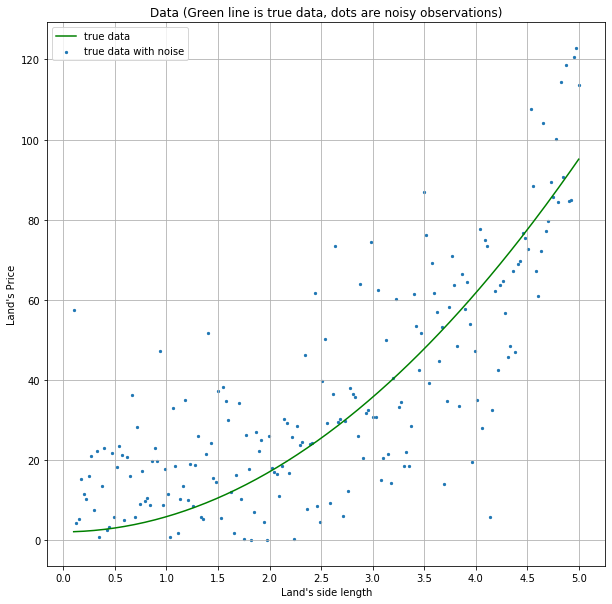

In [163]:
ax = plot_data(x, y, y_noise)

In [164]:
from sklearn.preprocessing import PolynomialFeatures

In [165]:
model = LinearRegression(fit_intercept=False)

In [166]:
poly = PolynomialFeatures(degree=10)

In [167]:
x, y, y_noise = generate_data(samples_num=20, eps_dev=15)
x.shape

(20,)

In [168]:
X2 = poly.fit_transform(x.reshape(-1,1)) #we have 200 samples and 1 feature, so we reshape it accordingly.
X2.shape

(20, 11)

In [169]:
model.fit(X2,y_noise)
with np.printoptions(precision=3, suppress=True):
    print(model.coef_)

[   61.845  -484.548  1626.493 -2937.972  3174.988 -2164.055   948.912
  -265.609    45.658    -4.379     0.179]


In [170]:
y_pred = model.predict(X2)

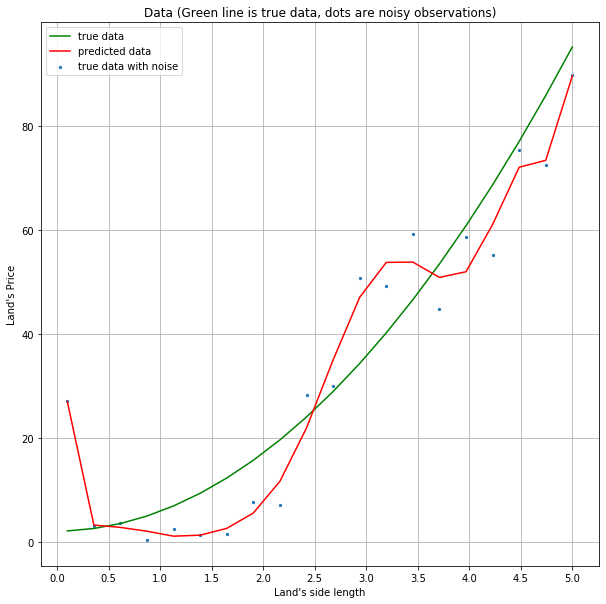

In [171]:
plot_data(x,y,y_noise,y_pred)

In [172]:
def fit_and_predict(model, polynom_degree=10, x_point=5):
    x, y, y_noise = generate_data(samples_num=500,eps_dev=30)
    poly = PolynomialFeatures(degree=polynom_degree)
    x1 = poly.fit_transform(x.reshape(-1,1))
    model.fit(x1,y_noise)
    x_point_polynomialed = poly.transform(np.array(x_point).reshape(-1,1))
    pred = model.predict(x_point_polynomialed)
    #print('Polynom degree {} coef: {}'.format(polynom_degree,model.coef_))
    return pred

In [173]:
def experiment(model,max_experiment_num = 1000, polynomial_degree = [1,2,3,4,5,6,7,8,9,10], point = 7):
    y_predictions_matr=np.zeros((len(polynomial_degree),max_experiment_num))

    for i, pol_degree in enumerate(polynomial_degree):
        for e in range(max_experiment_num):
            y_predictions_matr[i,e]=fit_and_predict(model,polynom_degree=pol_degree, x_point=point)
        
    y_pred_df = pd.DataFrame(index=['pol_deg_'+str(i+1) for i in range(y_predictions_matr.shape[0])])
    y_pred_df['y_true'] = true_relation(point)
    y_pred_df['pred_mean']=y_predictions_matr.mean(axis=1)
    y_pred_df['bias'] = y_pred_df['y_true'] - y_pred_df['pred_mean']
    y_pred_df['var']=y_predictions_matr.std(axis=1)
    
    fg, ax_list = plt.subplots(5,2,figsize=(15, 20))
    ax_list = ax_list.ravel()
    for i, p_deg in enumerate(polynomial_degree):
        label_str = 'Polynom degree {} \nPred_mean {:.2f} \nBias {:.2f} \nVar {:.2f}'.format(
            p_deg, 
            y_pred_df['pred_mean'][i],
            y_pred_df['bias'][i],
            y_pred_df['var'][i]
        )
        sns.distplot(y_predictions_matr[i,:], ax=ax_list[i], label=label_str)
        ax_list[i].scatter([true_relation(point)],[0],s=30,c='g',marker='x',label='y_true {:.2f}'.format(y_pred_df['y_true'][i]))
        ax_list[i].legend()
    return y_pred_df, y_predictions_matr


            y_true    pred_mean         bias            var
pol_deg_1    184.1   102.775693    81.324307       4.024477
pol_deg_2    184.1   184.168279    -0.068279      12.040238
pol_deg_3    184.1   212.678430   -28.578430      40.476621
pol_deg_4    184.1   179.459710     4.640290     132.823753
pol_deg_5    184.1   150.103953    33.996047     428.421219
pol_deg_6    184.1   200.852804   -16.752804    1423.288768
pol_deg_7    184.1   233.479494   -49.379494    4950.935370
pol_deg_8    184.1   -93.080853   277.180853   15393.699079
pol_deg_9    184.1  1764.362373 -1580.262373   52403.075685
pol_deg_10   184.1  3749.417749 -3565.317749  180126.823760


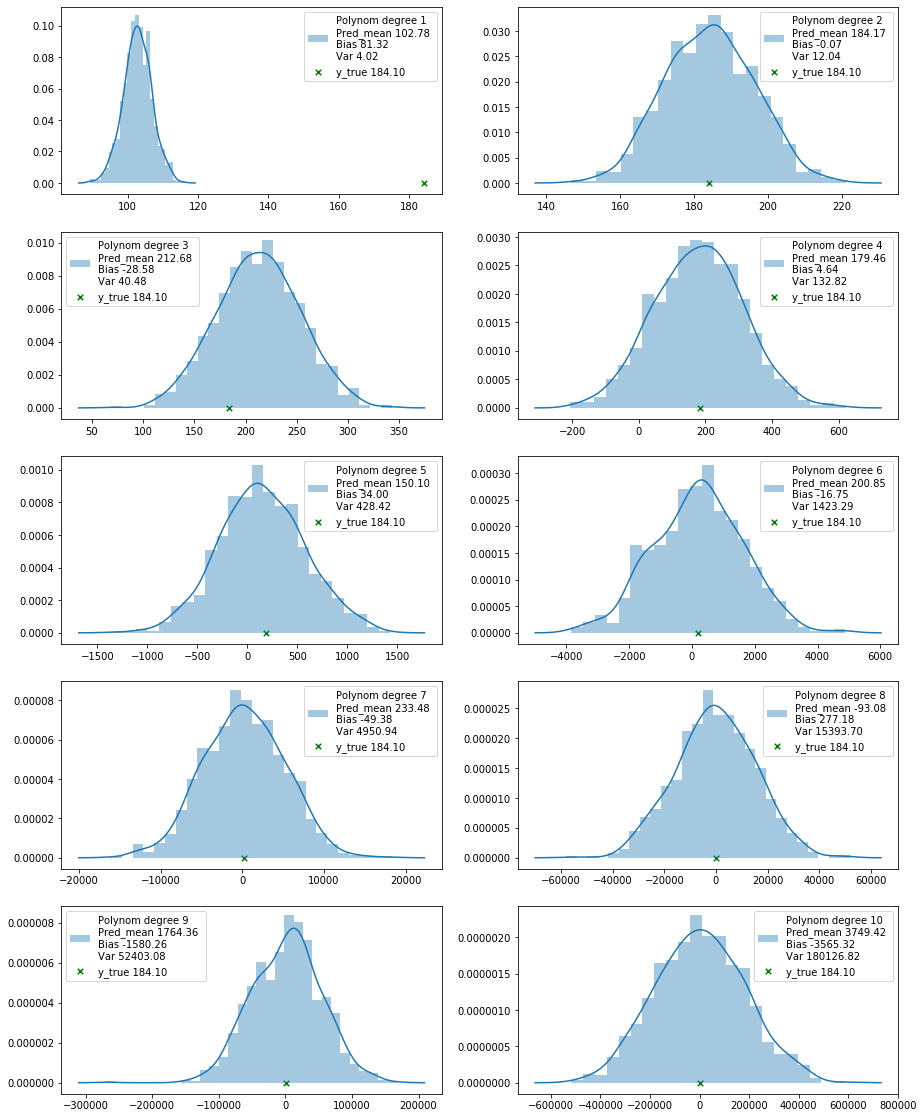

In [174]:
with np.printoptions(precision=7, suppress=True):
    y_metrics, y_pred = experiment(model,max_experiment_num=1000)
    print(y_metrics)

In [175]:
from sklearn.linear_model import Lasso, Ridge

In [176]:
ridge_model = Ridge(alpha=100,fit_intercept=False,solver='svd')

(            y_true    pred_mean         bias           var
 pol_deg_1    184.1   102.372533    81.727467      3.243171
 pol_deg_2    184.1   155.486922    28.613078      8.131566
 pol_deg_3    184.1   191.299477    -7.199477     22.253673
 pol_deg_4    184.1   264.402145   -80.302145     56.743123
 pol_deg_5    184.1   280.248446   -96.148446    156.927686
 pol_deg_6    184.1  -158.019679   342.119679    423.045286
 pol_deg_7    184.1  -561.018781   745.118781   1117.639301
 pol_deg_8    184.1  1845.206860 -1661.106860   3107.030154
 pol_deg_9    184.1  5192.792149 -5008.692149   8373.082722
 pol_deg_10   184.1 -8025.841946  8209.941946  21861.537831,
 array([[   101.42157213,     99.89850884,    103.87337089, ...,
            102.39375718,    101.42233413,    101.41873071],
        [   168.97684105,    169.10451284,    147.16441408, ...,
            149.28564954,    155.64541326,    149.02153867],
        [   156.83070119,    173.51393523,    167.12816522, ...,
            183.287391

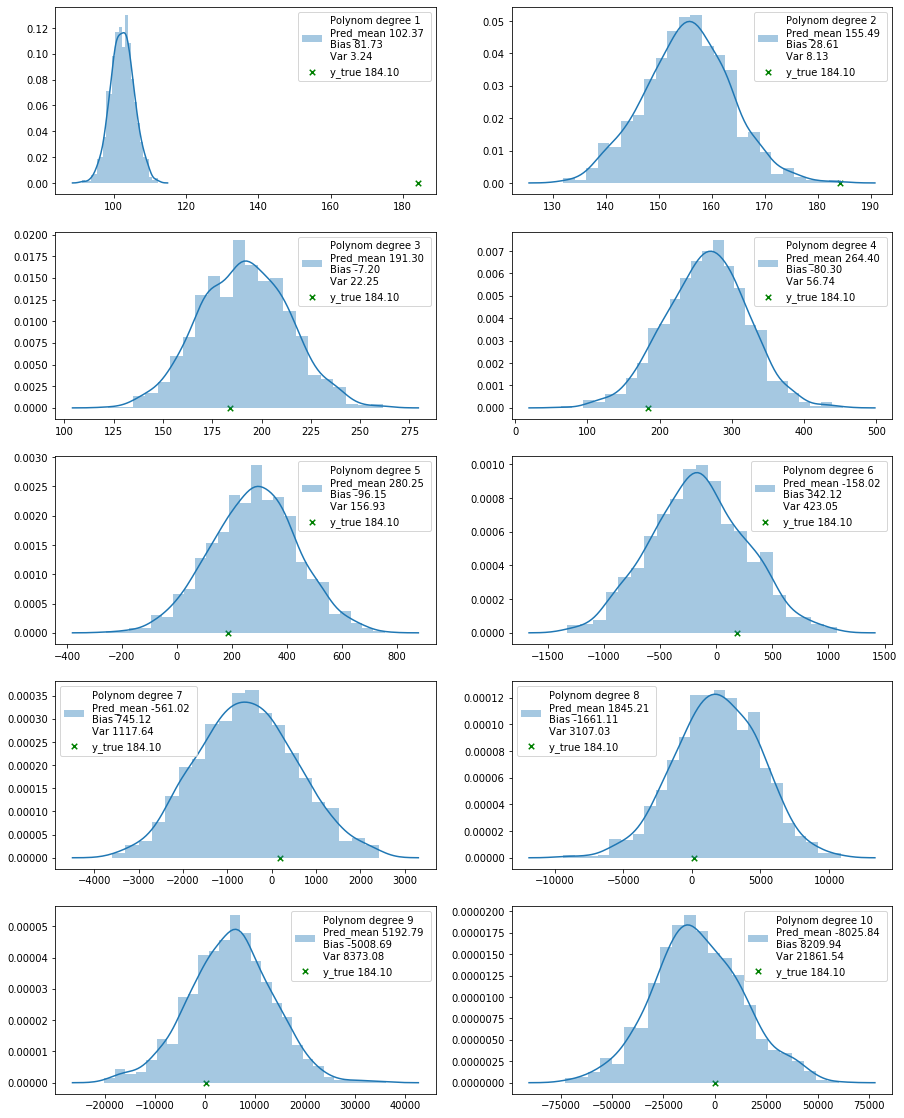

In [177]:
experiment(ridge_model)

In [178]:
ridge_model.coef_

array([ 9.21851243e+00,  5.55352306e+00,  3.45417110e+00,  1.70651464e+00,
        5.17355118e-02, -1.06546040e+00, -6.78317372e-01,  9.73315444e-01,
       -3.60434841e-01,  5.67383743e-02, -3.31864005e-03])

In [179]:
np.linalg.norm(ridge_model.coef_,ord=2)

11.547491643945227

In [180]:
np.linalg.norm(model.coef_,ord=2)

3144.8204668471953

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.25398595654406, tolerance: 144.5089113158081
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938.3441516284947, tolerance: 142.21254863893517
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2108.074228380341, tolerance: 143.29555889587854
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 895.9765810193494, tolerance: 131.0978820360626
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414.19896720396355, tolerance: 141.2151727574602
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.9036357899313, tolerance: 156.60829530177904
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.1484408233664, tolerance: 135.8417589014525
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.5727857127786, tolerance: 138.35746184607615
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820.2578403794905, tolerance: 143.12422021728895
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656.0213596073445, tolerance: 136.84385898986486
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503.64787673030514, tolerance: 135.5505619971854
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2296.4954067332437, tolerance: 138.58733691084515
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.7916116522392, tolerance: 146.71213212282393
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240.16889037855435, tolerance: 137.00014203488635
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1064.2447041414562, tolerance: 143.5856559551142
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2593.958583370375, tolerance: 147.89986207393923
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.0886902032653, tolerance: 135.72241369629947
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718.8392331672949, tolerance: 148.67662947851233
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1378.6985048287315, tolerance: 133.6427184051778
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098.780569541792, tolerance: 141.3420637055655
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1379.5430005962844, tolerance: 140.0013454194267
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746.361835788237, tolerance: 138.79143364403902
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1578.4032799178385, tolerance: 144.89369219223116
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1733.0662980442285, tolerance: 140.59521351492668
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366.9282272995915, tolerance: 131.8355319083403
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439.39445644483203, tolerance: 142.21549640257476
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.07565157295903, tolerance: 134.07550706643858
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.4149439153844, tolerance: 152.33796974776342
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578.3452575725969, tolerance: 150.44375881095343
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 674.7991856363369, tolerance: 137.49169739080492
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.8888622932136, tolerance: 144.89601155952238
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672.9599035700667, tolerance: 155.73753854680564
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.2660002289922, tolerance: 138.70447851043232
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.5538498359383, tolerance: 143.98621320294527
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.44832704949658, tolerance: 135.91516265688992
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.52319521125173, tolerance: 134.71427291538163
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.0604328863556, tolerance: 148.90469552834713
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.1433994981344, tolerance: 135.60982840511207
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.7928388842265, tolerance: 142.33491258495923
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.5824299057713, tolerance: 141.69437577816362
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377.5661624419736, tolerance: 152.6345082432349
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.46104022319196, tolerance: 138.26746057851528
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441.266739540617, tolerance: 138.97204590260355
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.2429540981539, tolerance: 141.3772458654623
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.8397322829114, tolerance: 150.41907017547797
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618.1568768197903, tolerance: 137.4782646686077
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.82013511186233, tolerance: 148.3287130727985
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.9805331099778, tolerance: 143.20960461871923
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.85178699105745, tolerance: 128.57225520727908
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.1703253081068, tolerance: 137.56212709378286
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.0739317709231, tolerance: 140.7206392403826
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.5331485896022, tolerance: 149.62851659342064
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.69308648555307, tolerance: 145.5445629150239
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.051126024744, tolerance: 139.97354284072006
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594.7673647421179, tolerance: 137.886886732311
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636.9002862260677, tolerance: 138.52841128934665
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539.2762410155847, tolerance: 151.7380715574106
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.22674939985154, tolerance: 141.21399151548846
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682.16371351626, tolerance: 134.5789919961329
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.1434409045032, tolerance: 139.5978874719495
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678.6948033755762, tolerance: 139.6076278796202
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640.4476279140799, tolerance: 137.13587428772686
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.30398347374285, tolerance: 139.36325481349618
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79462.68607682196, tolerance: 136.23991502415822
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71035.22545310244, tolerance: 152.00011979059175
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100104.22162191245, tolerance: 143.40167282963895
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45083.34090858637, tolerance: 135.1153169899153
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71389.87056475383, tolerance: 139.1417171627569
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104830.95345227464, tolerance: 137.37436022508507
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75336.7011076617, tolerance: 147.78820870009022
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108017.59024257047, tolerance: 146.45869475134606
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56300.07189964343, tolerance: 147.50331263880844
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61670.747486164095, tolerance: 138.90797573462044
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76059.96699199494, tolerance: 142.13859713862848
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66875.32284736054, tolerance: 141.72187353845797
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94502.74392188463, tolerance: 140.81216752281932
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61724.475168743316, tolerance: 143.65443560979165
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86405.90343222846, tolerance: 140.60517888495826
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61863.933742669324, tolerance: 146.26924711569666
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113947.196781651, tolerance: 143.15783626341246
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79508.64150458702, tolerance: 143.16440783634076
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73663.57844500532, tolerance: 139.2755699199026
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97593.23773944315, tolerance: 138.66828757985022
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78045.49586097864, tolerance: 134.23305110253682
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97050.90323161538, tolerance: 146.58115650511505
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102922.84283905267, tolerance: 142.03872889952203
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57291.193971847126, tolerance: 133.63596565277663
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68265.3433689843, tolerance: 128.75780525220603
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71794.45794662667, tolerance: 141.45317984342944
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79114.50506311675, tolerance: 142.54905425072505
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109217.23204533782, tolerance: 140.19753128706364
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89297.30713569069, tolerance: 145.0560313770385
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91239.52457227366, tolerance: 132.9222131891627
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70816.24194685573, tolerance: 147.67593200203487
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88168.38320203387, tolerance: 138.61553356329915
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71097.96583762427, tolerance: 153.41695762021087
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81745.26912867106, tolerance: 140.3415895824251
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120805.42782523824, tolerance: 134.06306305211314
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96721.50340856273, tolerance: 133.7300961063864
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75939.74817474533, tolerance: 129.93942497831532
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43552.20527725713, tolerance: 143.9070133037822
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38179.14212561748, tolerance: 137.61351874585847
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15441.657541564142, tolerance: 144.70818609629438
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69852.30397526402, tolerance: 139.36072453942913
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43466.43734454946, tolerance: 134.74787677597104
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55087.11107937517, tolerance: 135.8568954403943
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91149.6807255247, tolerance: 140.30177302348727
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84067.46130756626, tolerance: 142.48515484082128
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73756.08914301303, tolerance: 146.4636518030033
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52294.275650441064, tolerance: 133.52997156014433
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110333.4450947032, tolerance: 145.58570584202297
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112037.47699755226, tolerance: 145.12973177886155
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63823.74426354893, tolerance: 137.37411977844823
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41922.47365875883, tolerance: 140.768735831333
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140063.81295870026, tolerance: 125.89512565029048
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194947.40710810188, tolerance: 149.10480016456975
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142702.41756486305, tolerance: 139.82748275958886
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165782.5139158658, tolerance: 144.85354082865774
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178605.74336652126, tolerance: 163.42994900889786
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170315.0271144361, tolerance: 142.28288235918575
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163090.0604838602, tolerance: 142.8955395478171
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182738.81935092853, tolerance: 153.37182737195153
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161771.5927710914, tolerance: 136.36757243252436
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185671.98225771135, tolerance: 145.42877041563267
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153970.1530525777, tolerance: 129.70486270084314
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178577.04274123523, tolerance: 140.03722578963328
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160111.49553036422, tolerance: 137.88912418421734
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161169.81125442364, tolerance: 140.20770781151714
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166838.02257728844, tolerance: 142.56088755503495
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167310.2363847195, tolerance: 130.94590871944868
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161663.85704046604, tolerance: 140.86962497244733
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172530.50722799386, tolerance: 138.03738621429275
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189250.09684731302, tolerance: 153.0630638341757
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170256.76397927708, tolerance: 140.5997013181657
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178890.96970872802, tolerance: 135.98681948466424
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167348.7375555607, tolerance: 133.18286979186573
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173603.3733548496, tolerance: 142.21186793977813
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155679.49173788782, tolerance: 139.13347101282042
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152281.71314671717, tolerance: 131.0496845427127
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178839.96698951643, tolerance: 154.17357458972714
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160533.94134672222, tolerance: 135.45208678345836
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202442.1833377619, tolerance: 154.0347272155006
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158060.53812397717, tolerance: 135.37732815905704
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163439.68497405015, tolerance: 141.19491276964564
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154648.90752610777, tolerance: 132.42764531918124
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165601.6056590771, tolerance: 139.81762557290898
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174090.47307022315, tolerance: 153.92949002090285
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157999.8971928678, tolerance: 140.02594078798782
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156807.92416911008, tolerance: 145.51385702490046
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163230.84785952774, tolerance: 142.1740084227454
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158583.9945690129, tolerance: 138.62448022486453
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163114.99094589564, tolerance: 129.16633282634166
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156255.91901096638, tolerance: 135.81741942708675
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166353.18876868873, tolerance: 140.45286959749214
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189572.85503051154, tolerance: 149.60162486411306
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164460.81039479698, tolerance: 136.52121469280416
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163403.02119258756, tolerance: 147.36354092607155
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161172.60799172608, tolerance: 135.9816571039155
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168686.16427366278, tolerance: 132.6274712868921
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164615.22856607006, tolerance: 153.54749080469244
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154710.15903074414, tolerance: 130.41757173976785
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166832.69512442648, tolerance: 137.18320645162152
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181818.49229500943, tolerance: 138.16820830524728
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151073.8421427362, tolerance: 131.27718589224602
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154187.48994536343, tolerance: 135.61991438333888
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168546.85748839832, tolerance: 136.50337928495665
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160711.0008867393, tolerance: 134.3787299390544
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169272.68017513998, tolerance: 139.30963017095777
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172730.35852039198, tolerance: 137.31589693958782
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157476.84936123824, tolerance: 142.11273910289
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167273.8416546064, tolerance: 139.7383167462258
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180378.75917413246, tolerance: 142.68046250122873
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193950.79405420582, tolerance: 140.0059452851078
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180923.51906024542, tolerance: 134.04887013852246
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183681.51338473268, tolerance: 140.24706878673797
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184588.07299767714, tolerance: 142.93106297891185
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179433.10063044235, tolerance: 134.21021930676676
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200638.03571557242, tolerance: 151.99646026180528
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186741.5960484534, tolerance: 143.0871172920614
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186812.20601261023, tolerance: 135.86354103537045
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183808.55566248237, tolerance: 136.11903366273157
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212266.9570352388, tolerance: 146.10918509212297
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183186.65047385625, tolerance: 139.1004805273838
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198447.11213674778, tolerance: 150.61753800213032
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151702.92821883506, tolerance: 163.88992289472068
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134136.461332138, tolerance: 140.7896674756293
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191820.51636207587, tolerance: 135.05867132671136
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180232.44113452057, tolerance: 141.9578084620004
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191821.97097739475, tolerance: 150.41882217568454
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183496.03409338617, tolerance: 141.47618586319788
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183119.87461340852, tolerance: 151.7927687301145
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179436.42202540784, tolerance: 141.36835491789031
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186792.3092720931, tolerance: 130.6852678846199
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201824.01454726057, tolerance: 139.84989142756498
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183591.9155127032, tolerance: 146.16690119498102
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195181.8889658407, tolerance: 140.21272162258916
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208632.96701124677, tolerance: 157.3860127600268
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170806.01767629685, tolerance: 141.9979701703122
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194777.79373257753, tolerance: 137.90611089169136
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193013.068616791, tolerance: 147.29934601348128
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190064.01047511684, tolerance: 140.29734437798024
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174714.38586856407, tolerance: 144.85320766615524
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198680.02444817842, tolerance: 148.8480131765332
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174615.13429642617, tolerance: 135.91901619756243
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190306.11443663522, tolerance: 146.20841382710182
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178948.1468637735, tolerance: 138.00983425326106
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173693.7605993835, tolerance: 139.60007059501342
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185793.59481922464, tolerance: 146.7562387899806
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183480.99081449924, tolerance: 145.2870281138079
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183492.178967079, tolerance: 144.41342948793155
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173890.89961246072, tolerance: 138.47695720638927
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170114.6161446206, tolerance: 137.53222687419435
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190991.01751175977, tolerance: 142.577243295535
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184866.11456432223, tolerance: 141.16101377537154
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189473.98109421425, tolerance: 133.80166875430203
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148755.56656949915, tolerance: 145.85640181977217
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181113.65616898044, tolerance: 137.40267060055626
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157894.6769652017, tolerance: 140.07779882931203
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183867.98864415236, tolerance: 144.23895575320472
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185171.9048143738, tolerance: 146.9665262010394
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181656.67793255363, tolerance: 144.19677819427687
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150334.99865949596, tolerance: 140.34286041277744
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199388.34277447846, tolerance: 151.1300994457676
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191254.6426054667, tolerance: 139.4388537928412
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184484.0287392276, tolerance: 155.8222887955272
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182621.67548003615, tolerance: 135.74654312517995
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193068.81665391737, tolerance: 133.99385827495976
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187316.6894686305, tolerance: 135.9510747131051
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174116.86110339954, tolerance: 143.060734963375
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189572.5077387515, tolerance: 136.45519710396147
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206268.4261163994, tolerance: 139.41747795230634
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198259.63882483053, tolerance: 141.46058569570965
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213468.29583014478, tolerance: 143.2204778196808
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191081.00099512757, tolerance: 141.78536155775754
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147360.45857383413, tolerance: 129.91894659826463
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197231.64447071837, tolerance: 146.88430413533194
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182757.2787747748, tolerance: 138.06123472656614
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192143.7318927372, tolerance: 140.90214399576035
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201244.59130710404, tolerance: 142.83016429207237
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175035.61188647925, tolerance: 133.91915998742752
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182202.68868639754, tolerance: 136.02005221837402
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179436.15547287403, tolerance: 144.87668610655876
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185812.76718801426, tolerance: 145.2304239366942
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190152.56754652804, tolerance: 135.62681690923452
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210787.64014756266, tolerance: 148.24693575018952
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179417.75375077862, tolerance: 145.40413414785914
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199667.0500328828, tolerance: 144.21953664986086
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181879.65809372396, tolerance: 134.43810594015093
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199948.0205612692, tolerance: 136.32012057246166
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192939.9949347593, tolerance: 150.2454452578932
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196739.0044616847, tolerance: 150.07084826406464
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195655.19200348656, tolerance: 135.83625233011463
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204877.6850729966, tolerance: 146.5521112036632
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200965.74128135951, tolerance: 144.28814304482
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157765.91922340624, tolerance: 128.07041810005134
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194432.7770137264, tolerance: 149.1021422570614
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209407.581828147, tolerance: 141.9022136664977
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191363.21291885964, tolerance: 140.92363043462353
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207315.82914903652, tolerance: 144.99069030345422
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181238.97789473285, tolerance: 128.39531149681807
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171785.70544389886, tolerance: 135.8832562785077
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193675.08718104198, tolerance: 134.83074938864314
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174426.40208358192, tolerance: 123.9100696086459
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190865.49623382185, tolerance: 135.49283320143672
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188527.19844893983, tolerance: 145.2920666409993
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169822.90108788732, tolerance: 136.58427445708483
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197331.75594617293, tolerance: 141.48622001633325
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194910.06535785648, tolerance: 139.96089737319426
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209169.15126547933, tolerance: 145.47450360875618
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187022.7131527608, tolerance: 137.24350077645263
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182283.9261889337, tolerance: 129.25386537686268
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201234.41811723117, tolerance: 147.2284877272309
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179067.0521106359, tolerance: 144.11259534366346
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196310.06615454803, tolerance: 147.79606716447418
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191494.5221308559, tolerance: 134.2228298631899
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196629.70220891258, tolerance: 137.5317504481786
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192176.57485344313, tolerance: 147.5672671100863
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197749.89667932317, tolerance: 139.1210765193846
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191764.36451984773, tolerance: 139.0407478060524
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209550.64068115974, tolerance: 143.76616853814448
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195964.60854203187, tolerance: 151.37569482949525
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194598.01576460182, tolerance: 144.9564972881841
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203059.85340467855, tolerance: 150.88755355589933
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185137.2258386753, tolerance: 127.64055416788543
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184361.7370792714, tolerance: 143.1711658048581
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195424.29021458776, tolerance: 137.1068819618633
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213454.20687445477, tolerance: 145.2783994551556
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193748.96178857225, tolerance: 135.81589278447652
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198477.61073077234, tolerance: 143.7348609376979
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172425.04844797836, tolerance: 135.6994921565327
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199464.06498629117, tolerance: 145.39305995110325
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215256.06179390254, tolerance: 145.7166192212982
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165801.82142817898, tolerance: 137.64631014306235
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179630.68709829557, tolerance: 140.59783646995368
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189191.89489664143, tolerance: 141.88436380221805
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182494.12936044662, tolerance: 141.77135226758782
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179134.38532655174, tolerance: 135.69460830699435
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171719.6629936967, tolerance: 130.50527674646207
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170610.54313908354, tolerance: 142.92935314117165
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198079.66483679577, tolerance: 136.98846997343506
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200462.9699920021, tolerance: 137.8242073661335
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197831.01139248413, tolerance: 145.98673103547173
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209121.08590513954, tolerance: 155.38144199855375
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214488.94848208025, tolerance: 142.89152270757177
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197410.18642849653, tolerance: 150.1074992320799
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191667.60444838868, tolerance: 141.61366722526503
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201554.74080048467, tolerance: 135.76640232285644
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200281.90998689318, tolerance: 138.44770098634834
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203167.77238687553, tolerance: 142.62665069129224
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208725.37661037032, tolerance: 142.1381404728969
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201514.24987586716, tolerance: 142.53908975850308
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190788.01727227692, tolerance: 138.65966584125994
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214007.48897656926, tolerance: 141.38808453100506
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213742.04309009403, tolerance: 146.78091532187162
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187835.513612129, tolerance: 142.39569215546075
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177965.73894561143, tolerance: 128.49418597708777
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211413.55856141122, tolerance: 138.94934763745323
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221859.57229038753, tolerance: 158.2993867857563
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178632.3819322047, tolerance: 128.27600731633746
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189976.03034164032, tolerance: 142.89769678047722
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189729.6306738467, tolerance: 140.330092971608
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181913.62592388445, tolerance: 140.6198904987227
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197458.2173112539, tolerance: 138.266374883064
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192776.91100325424, tolerance: 138.80890280345312
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194557.31091836505, tolerance: 141.48177993722547
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216611.39454618443, tolerance: 140.43640944221997
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202201.01583769216, tolerance: 141.6613376622639
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190819.0578520875, tolerance: 136.88404966884178
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192023.01244873495, tolerance: 138.49500962846508
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202130.13275854362, tolerance: 141.8152002466313
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192992.42182260554, tolerance: 146.5058553993058
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176564.4244729464, tolerance: 125.3731079499647
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210459.7340666189, tolerance: 139.40033767542863
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197505.5498288549, tolerance: 131.74216640827913
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210437.89789723503, tolerance: 146.63087433144446
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195757.39576579188, tolerance: 139.00703806650773
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195154.18176583629, tolerance: 148.69413518386457
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183492.04963841056, tolerance: 135.352203288841
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208625.1447587565, tolerance: 143.1850044377517
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\li

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203010.4713760376, tolerance: 140.94109775724115
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190173.51305460953, tolerance: 137.16595584037728
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198833.67290099224, tolerance: 146.89840383126233
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202945.97794593402, tolerance: 140.34826829602721
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197400.98289527863, tolerance: 139.2446614533324
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185858.12502670442, tolerance: 148.93466326433133
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207226.02560363535, tolerance: 142.25821962226073
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187308.9112562844, tolerance: 143.2124176777289
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180792.94582618144, tolerance: 134.93206114984747
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198912.63656723584, tolerance: 135.3074602593189
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181439.2149554138, tolerance: 136.6824759133809
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196365.25080020705, tolerance: 133.56207821289715
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\l

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189850.72356800642, tolerance: 141.12327779207692
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205998.64801551017, tolerance: 143.4387210346021
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203334.50436371405, tolerance: 145.5239605340783
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209190.88238391685, tolerance: 147.04450623533944
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201131.78353864962, tolerance: 139.9926472246412
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197156.56043874103, tolerance: 137.54217686767572
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191498.3976198851, tolerance: 141.46761203035297
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211269.3922760736, tolerance: 147.38688150783136
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193961.75114942013, tolerance: 142.83341964759967
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196838.9404955977, tolerance: 133.95931866850665
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220309.12460457094, tolerance: 138.22302801912784
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221204.83698931732, tolerance: 147.56839112653017
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196677.10277497716, tolerance: 139.4516817369933
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215604.94321607615, tolerance: 144.3196400559456
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209129.33330936928, tolerance: 139.36073006160194
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183429.74638462684, tolerance: 133.19332388790272
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209873.43326052406, tolerance: 130.80996244048643
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207877.84625831927, tolerance: 145.24708737063114
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\m

C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191075.12420679635, tolerance: 145.7119383204986
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212535.36249938878, tolerance: 150.34575854410582
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196148.93623766387, tolerance: 143.59342158010284
  positive)
C:\Users\v.khukhunashvili\AppData\Local\Continuum\miniconda3\envs\ml

(            y_true    pred_mean         bias         var
 pol_deg_1    184.1   103.129377    80.970623    2.939512
 pol_deg_2    184.1   192.367649    -8.267649    6.349702
 pol_deg_3    184.1   190.380245    -6.280245    9.946484
 pol_deg_4    184.1   141.464387    42.635613   33.930834
 pol_deg_5    184.1    41.895438   142.204562   83.161648
 pol_deg_6    184.1   141.343857    42.756143  141.715616
 pol_deg_7    184.1   453.688386  -269.588386  239.143907
 pol_deg_8    184.1   798.866850  -614.766850  353.269684
 pol_deg_9    184.1  1101.209567  -917.109567  514.751516
 pol_deg_10   184.1  1315.012629 -1130.912629  841.307725,
 array([[ 103.80061775,  106.69432884,   98.66843278, ...,  104.58405093,
          100.59444575,  103.29285407],
        [ 187.40502597,  199.62918755,  203.11106036, ...,  192.91071525,
          198.91978063,  189.59866484],
        [ 195.35367916,  187.4449747 ,  191.0520757 , ...,  162.17851211,
          199.12003428,  178.84590376],
        ...,
      

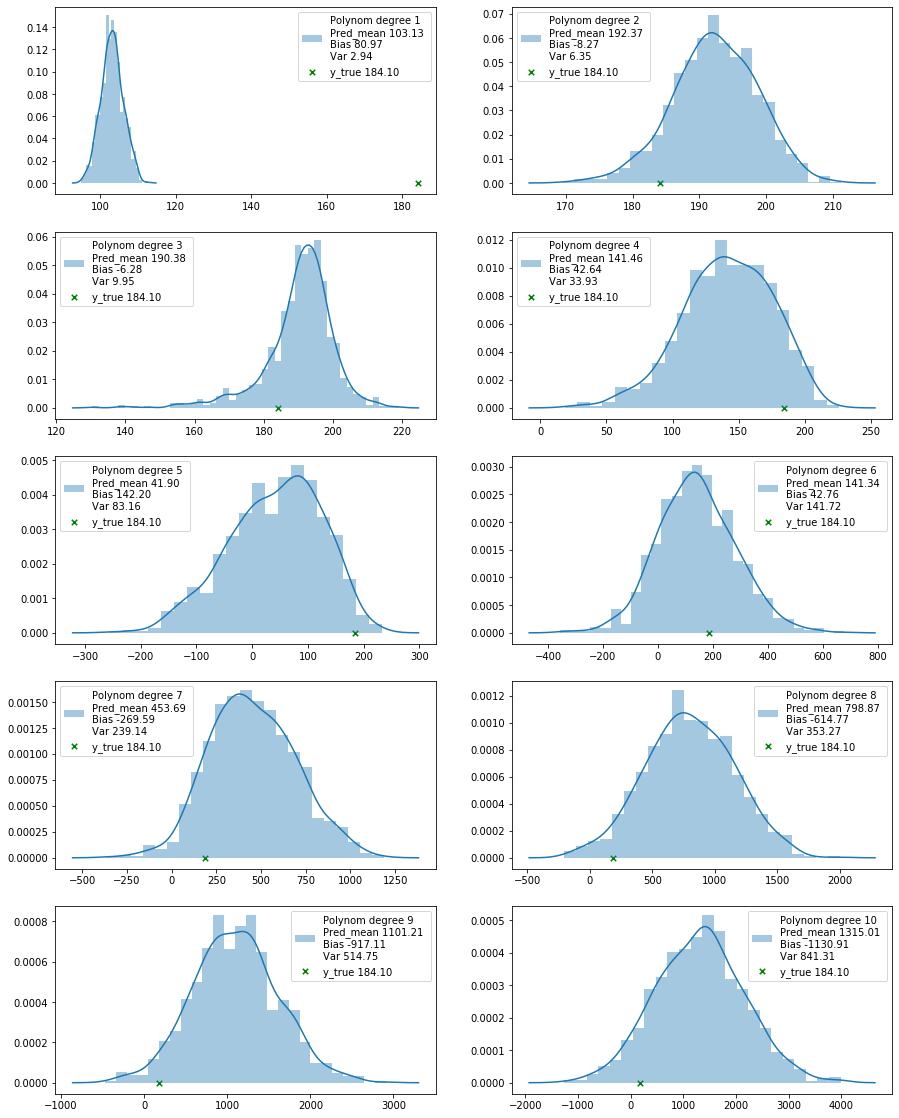

In [181]:
lasso_model = Lasso(alpha=10,fit_intercept=False)
experiment(lasso_model)

In [182]:
fit_and_predict(model,polynom_degree=3,x_point=7)

array([190.96170118])

In [183]:
fit_and_predict(ridge_model,polynom_degree=3,x_point=7)

array([178.39499809])

In [184]:
fit_and_predict(lasso_model,polynom_degree=3,x_point=7)

array([197.61583021])

In [185]:
print(np.linalg.norm(model.coef_,ord=2))
print(np.linalg.norm(ridge_model.coef_,ord=2))
print(np.linalg.norm(lasso_model.coef_,ord=2))

27.467677936436722
12.132390217234198
3.691557977094875


In [186]:
x, y, y_noise = generate_data(20, 20)

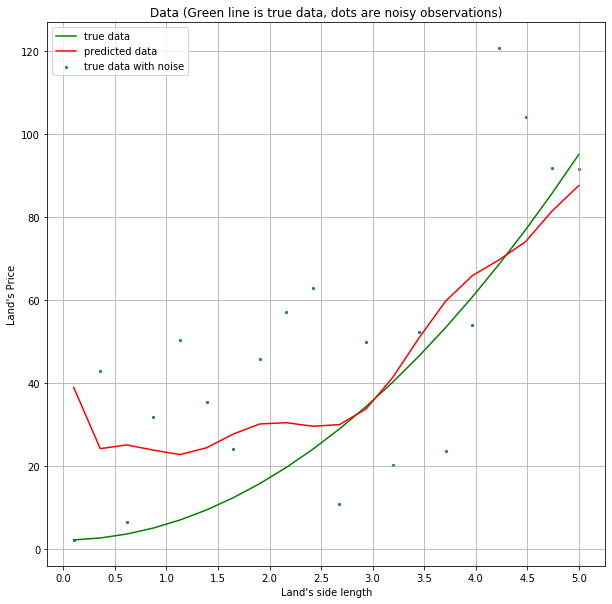

In [187]:
plot_data(x,y,y_noise,fit_and_predict(model,polynom_degree=10,x_point=x))

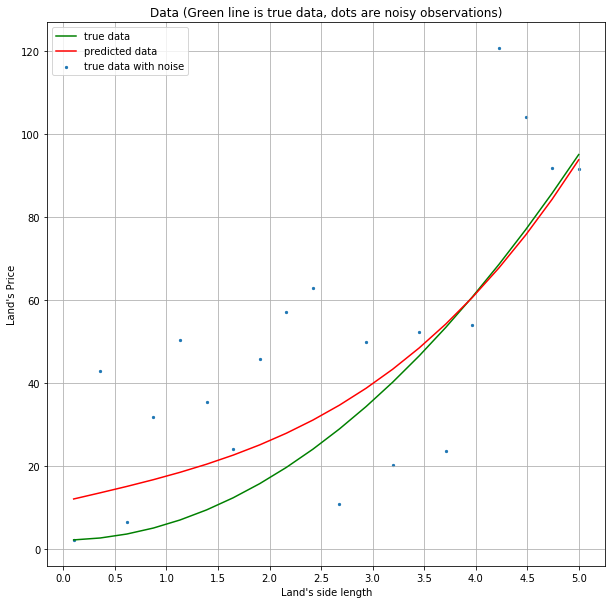

In [188]:
plot_data(x,y,y_noise,fit_and_predict(ridge_model,polynom_degree=3,x_point=x))

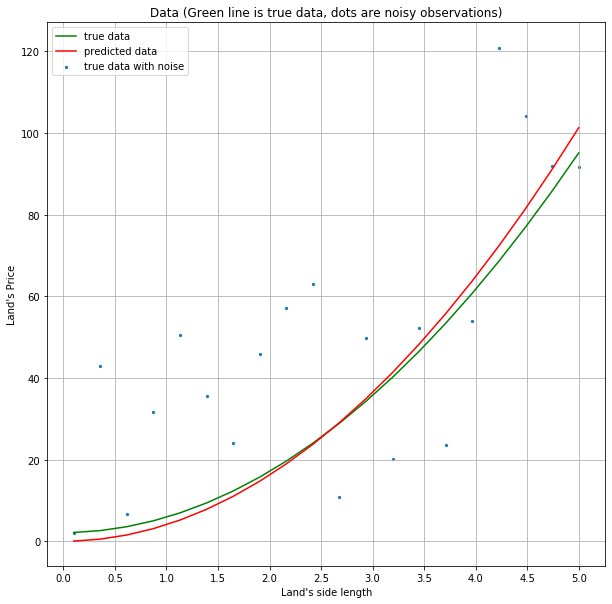

In [189]:
plot_data(x,y,y_noise,fit_and_predict(lasso_model,polynom_degree=2,x_point=x))